In [15]:
from deepface import DeepFace
import cv2
import pandas as pd
import numpy as np

In [30]:
video_path = "/Users/rusiq/Downloads/youtube_dl/katka2_nosound1080p.mp4"
frame_number = 10300
cap = cv2.VideoCapture(video_path)
cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)
ret, frame = cap.read()
cap.release()

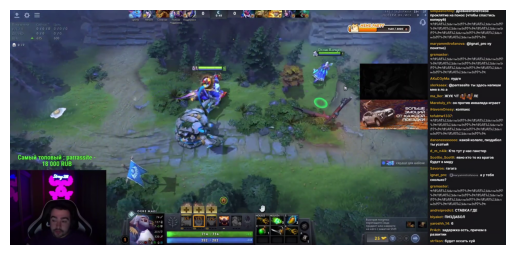

In [31]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

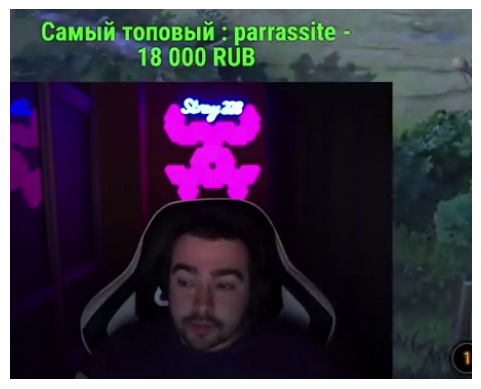

In [32]:
x, y, w, h = 0, 550, 450, 400  # Change these values based on your ROI
cropped = frame[y:y+h, x:x+w]

# Cell 5: Show cropped frame
plt.imshow(cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

In [13]:
def get_emotion_scores(img):
    try:
        # Analyze emotions in the image
        result = DeepFace.analyze(img, actions=['emotion'], enforce_detection=False)
        
        # Extract emotion values (handles both single face and multiple faces)
        if isinstance(result, list):
            # Return first face if multiple detected
            emotions = result[0]['emotion']
        else:
            emotions = result['emotion']
            
        # Convert to simple dict with scores
        return emotions
    except Exception as e:
        print(f"Error analyzing emotions: {e}")
        return None

In [18]:
def analyze_video_emotions(video_path, frame_step=100, roi=None):
    # Open video
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print("Error opening video file")
        return None
    
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    frames_to_analyze = range(0, total_frames, frame_step)
    results = []
    
    # Define ROI if not provided
    if roi is None:
        roi = [0, 0, -1, -1]  # Use full frame
    
    # Process frames
    for frame_number in frames_to_analyze:
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)
        ret, frame = cap.read()
        
        if not ret:
            continue
            
        # Crop frame to ROI if specified
        if roi[2] > 0 and roi[3] > 0:  # If width and height are positive
            x, y, w, h = roi
            cropped = frame[y:y+h, x:x+w]
        else:
            cropped = frame
        
        try:
            # Analyze emotions
            result = DeepFace.analyze(cropped, actions=['emotion'], enforce_detection=False)
            
            # Extract emotion values
            if isinstance(result, list):
                emotions = result[0]['emotion']
            else:
                emotions = result['emotion']
                
            # Add frame number to results
            emotions['frame_number'] = frame_number
            results.append(emotions)
            
            print(f"Processed frame {frame_number}/{total_frames}")
            
        except Exception as e:
            print(f"Error processing frame {frame_number}: {e}")
    
    cap.release()
    
    # Create dataframe
    if results:
        df = pd.DataFrame(results)
        return df
    else:
        return pd.DataFrame()

def get_top_emotion_frames(df, emotion_type, top_n=5):
    """Get frame numbers with highest values for a specific emotion"""
    if emotion_type not in df.columns:
        print(f"Emotion {emotion_type} not found in results")
        return []
    
    # Sort by the emotion value (descending) and get top N
    top_frames = df.sort_values(by=emotion_type, ascending=False)[['frame_number', emotion_type]].head(top_n)
    return top_frames

In [19]:
# Example usage:
video_path = "/Users/rusiq/Downloads/youtube_dl/katka2_nosound1080p.mp4"
roi = [0, 550, 450, 400]
emotions_df = analyze_video_emotions(video_path, frame_step=100, roi=roi)
# 
# # Get top 5 frames for each emotion
# emotion_types = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
# for emotion in emotion_types:
#     top_frames = get_top_emotion_frames(emotions_df, emotion, top_n=5)
#     print(f"Top 5 frames for {emotion}:")
#     print(top_frames)

Processed frame 0/210841
Processed frame 100/210841
Processed frame 200/210841
Processed frame 300/210841
Processed frame 400/210841
Processed frame 500/210841
Processed frame 600/210841
Processed frame 700/210841
Processed frame 800/210841
Processed frame 900/210841
Processed frame 1000/210841
Processed frame 1100/210841
Processed frame 1200/210841
Processed frame 1300/210841
Processed frame 1400/210841
Processed frame 1500/210841
Processed frame 1600/210841
Processed frame 1700/210841
Processed frame 1800/210841
Processed frame 1900/210841
Processed frame 2000/210841
Processed frame 2100/210841
Processed frame 2200/210841
Processed frame 2300/210841
Processed frame 2400/210841
Processed frame 2500/210841
Processed frame 2600/210841
Processed frame 2700/210841
Processed frame 2800/210841
Processed frame 2900/210841
Processed frame 3000/210841
Processed frame 3100/210841
Processed frame 3200/210841
Processed frame 3300/210841
Processed frame 3400/210841
Processed frame 3500/210841
Proc

In [20]:
emotion_types = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
for emotion in emotion_types:
    top_frames = get_top_emotion_frames(emotions_df, emotion, top_n=5)
    print(f"Top 5 frames for {emotion}:")
    print(top_frames)

Top 5 frames for angry:
      frame_number      angry
1133        113300  99.972552
103          10300  99.971098
747          74700  99.957454
692          69200  99.951166
1999        199900  99.950033
Top 5 frames for disgust:
     frame_number    disgust
76           7600  52.132571
822         82200  47.258741
669         66900  37.456551
40           4000  32.801190
799         79900  23.806532
Top 5 frames for fear:
      frame_number       fear
2035        203500  98.846984
236          23600  87.032235
737          73700  80.317456
1925        192500  79.375427
1217        121700  75.447635
Top 5 frames for happy:
      frame_number      happy
513          51300  99.999964
1580        158000  99.995434
1581        158100  99.993813
952          95200  99.986005
1051        105100  99.985957
Top 5 frames for sad:
      frame_number        sad
384          38400  99.999535
1694        169400  99.993604
388          38800  99.991441
1323        132300  99.988246
810          8100

In [192]:
model_name="OpenGVLab/InternVL2.5-8B"
device="cpu"

# Set device (GPU or CPU)
print(f"Using device: {device}")

# Load model and processor
model = AutoModel.from_pretrained("OpenGVLab/InternVL2_5-8B", trust_remote_code=True)

# Set model to evaluation mode
model.eval()
print("Model loaded successfully!")

Using device: cpu


A new version of the following files was downloaded from https://huggingface.co/OpenGVLab/InternVL2_5-8B:
- conversation.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/OpenGVLab/InternVL2_5-8B:
- modeling_intern_vit.py
- conversation.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
/usr/local/Caskroom/miniconda/base/envs/whisper/lib/python3.9/site-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)


FlashAttention2 is not installed.


  warnings.warn(


KeyboardInterrupt: 

OCR Result (Inverted):
 27111

